# Base Code

In [2]:
from typing import List
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from datetime import datetime
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

special_character = ['(', ')', '%', ':', '-', '$', '—', "'", ';', '‘', '’']
punctuation_marks = {',', '।', '!', '?'}

def custom_tokenize(text):
    space_split_tokens = text.split()
    tokens1 = []
    for token in space_split_tokens:
        if token and token[-1] in punctuation_marks:
            tokens1.append(token[:-1])
            tokens1.append(token[-1])
        else:
            tokens1.append(token)
    tokens = []
    for token in tokens1:
        tmp = ""
        for ch in token:
            if ch not in special_character:
                tmp += ch
            else:
                if tmp:
                    tokens.append(tmp)
                    tmp = ""
                tokens.append(ch)
        if tmp:
            tokens.append(tmp)
    return tokens

# Label mapping
label_id_to_str = {0: "O", 1: "X", 2: "Y"}
label_names = ["O", "X", "Y"]

# Load datasets
train_data = pd.read_json("/content/final_train1.json")
test_data = pd.read_json("/content/final_testing1.json")

# Step 1: Flatten the dataset for classical ML
rows = []
for _, row in train_data.iterrows():
    tokens = custom_tokenize(row["text"])  # Use custom tokenizer
    labels = row["label"]
    if len(tokens) != len(labels):
        raise ValueError(f"Token and label lengths do not match for text: {row['text']}")
    for token, label in zip(tokens, labels):
        if label in [0, 1, 2]:  # Only include labels 0, 1, 2
            rows.append({"token": token, "label": label})

# Create a new DataFrame with tokens and labels
df = pd.DataFrame(rows)

# Step 2: Feature extraction using CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))  # Character n-grams for token-level features
X = vectorizer.fit_transform(df["token"])  # Features
y = df["label"]  # Labels


# Process test dataset
test_rows = []
for _, row in test_data.iterrows():
    tokens = custom_tokenize(row["text"])
    labels = row["label"]
    # if len(tokens) != len(labels):
        # raise ValueError(f"Token and label lengths do not match for text: {row['text']}")
    for token, label in zip(tokens, labels):
        if label in [0, 1, 2]:
            test_rows.append({"token": token, "label": label})
test_df = pd.DataFrame(test_rows)
X_test = vectorizer.transform(test_df["token"])
y_test = test_df["label"]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, label_names, title="Normalized Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

    # Normalize the confusion matrix row-wise
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    return cm_normalized


# Random Forest


Test Classification Report:

              precision    recall  f1-score   support

           O     0.9341    0.9503    0.9421     15892
           X     0.7022    0.6217    0.6595      2461
           Y     0.9131    0.9148    0.9140      3264

    accuracy                         0.9075     21617
   macro avg     0.8498    0.8289    0.8385     21617
weighted avg     0.9045    0.9075    0.9057     21617



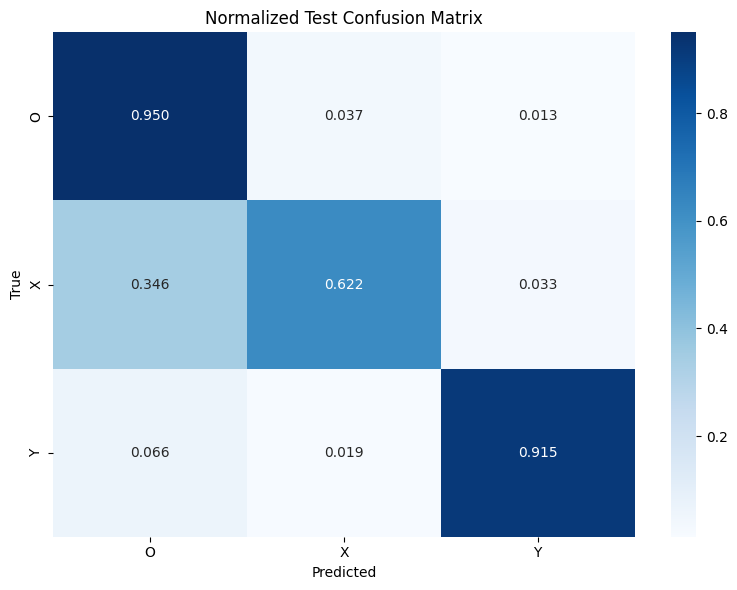

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
y_pred_test = clf.predict(X_test)
print("\nTest Classification Report:\n")
report_test = classification_report(y_test, y_pred_test, target_names=label_names, digits=4, output_dict=True)
print(classification_report(y_test, y_pred_test, target_names=label_names, digits=4))
cm = plot_confusion_matrix(y_test, y_pred_test, label_names, title="Normalized Test Confusion Matrix")

# SVM


Test Classification Report:

              precision    recall  f1-score   support

           O     0.9340    0.9526    0.9432     15892
           X     0.7145    0.6152    0.6611      2461
           Y     0.9106    0.9176    0.9141      3264

    accuracy                         0.9089     21617
   macro avg     0.8530    0.8285    0.8395     21617
weighted avg     0.9055    0.9089    0.9067     21617



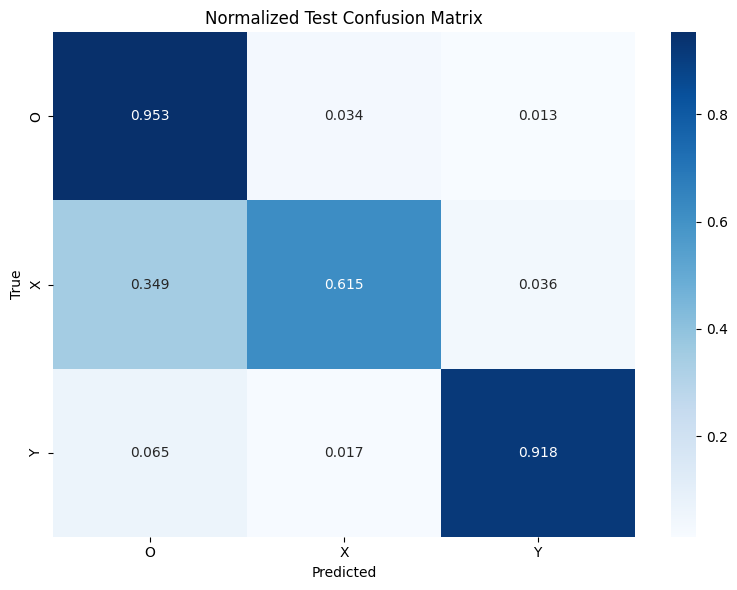

In [8]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1.0, random_state=42)  # You can change kernel='linear' or others as needed
clf.fit(X, y)
y_pred_test = clf.predict(X_test)
print("\nTest Classification Report:\n")
report_test = classification_report(y_test, y_pred_test, target_names=label_names, digits=4, output_dict=True)
print(classification_report(y_test, y_pred_test, target_names=label_names, digits=4))
cm = plot_confusion_matrix(y_test, y_pred_test, label_names, title="Normalized Test Confusion Matrix")

# MNB


Test Classification Report:

              precision    recall  f1-score   support

           O     0.9406    0.8791    0.9088     15892
           X     0.4845    0.6928    0.5702      2461
           Y     0.8854    0.8805    0.8829      3264

    accuracy                         0.8581     21617
   macro avg     0.7702    0.8175    0.7873     21617
weighted avg     0.8804    0.8581    0.8663     21617



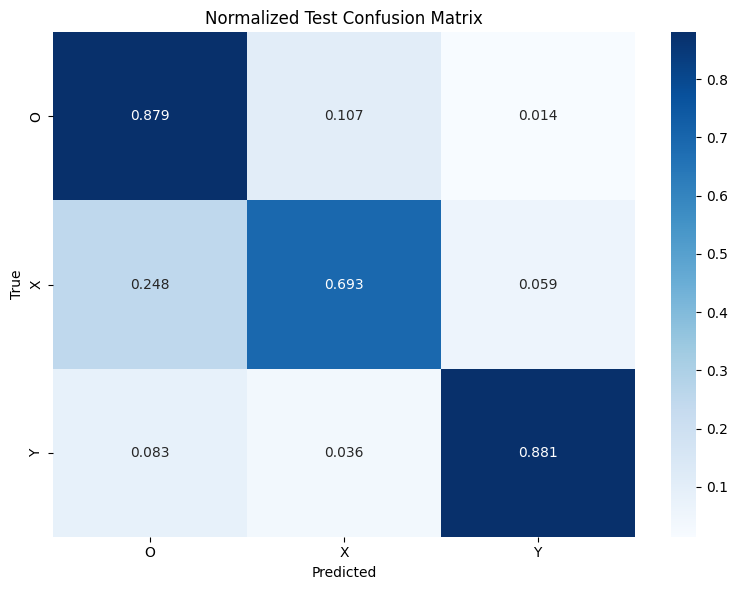

In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
y_pred_test = clf.predict(X_test)
print("\nTest Classification Report:\n")
report_test = classification_report(y_test, y_pred_test, target_names=label_names, digits=4, output_dict=True)
print(classification_report(y_test, y_pred_test, target_names=label_names, digits=4))
cm = plot_confusion_matrix(y_test, y_pred_test, label_names, title="Normalized Test Confusion Matrix")

# Logistic regression


Test Classification Report:

              precision    recall  f1-score   support

           O     0.9322    0.9465    0.9393     15892
           X     0.6813    0.6063    0.6416      2461
           Y     0.9098    0.9173    0.9135      3264

    accuracy                         0.9034     21617
   macro avg     0.8411    0.8234    0.8315     21617
weighted avg     0.9002    0.9034    0.9015     21617



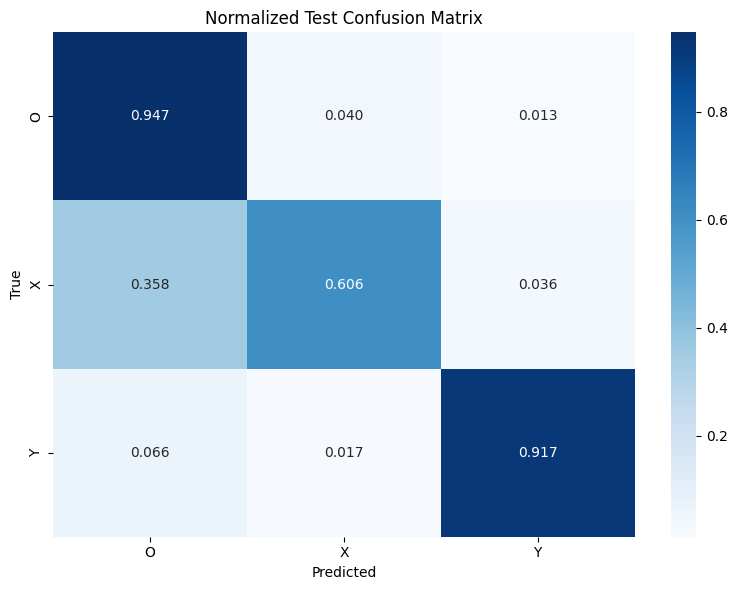

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X, y)
y_pred_test = clf.predict(X_test)
print("\nTest Classification Report:\n")
report_test = classification_report(y_test, y_pred_test, target_names=label_names, digits=4, output_dict=True)
print(classification_report(y_test, y_pred_test, target_names=label_names, digits=4))
cm = plot_confusion_matrix(y_test, y_pred_test, label_names, title="Normalized Test Confusion Matrix")

# Decision Tree


Test Classification Report:

              precision    recall  f1-score   support

           O     0.9325    0.9498    0.9411     15892
           X     0.7028    0.6225    0.6602      2461
           Y     0.9096    0.9059    0.9078      3264

    accuracy                         0.9059     21617
   macro avg     0.8483    0.8261    0.8363     21617
weighted avg     0.9029    0.9059    0.9041     21617



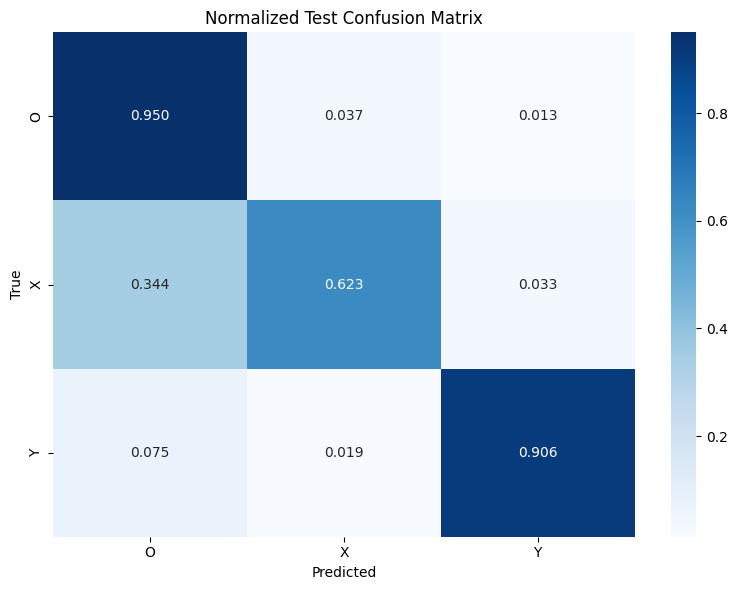

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
y_pred_test = clf.predict(X_test)
print("\nTest Classification Report:\n")
report_test = classification_report(y_test, y_pred_test, target_names=label_names, digits=4, output_dict=True)
print(classification_report(y_test, y_pred_test, target_names=label_names, digits=4))
cm = plot_confusion_matrix(y_test, y_pred_test, label_names, title="Normalized Test Confusion Matrix")